#### Data Loading

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('Dataset.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [23]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [24]:
print(df.shape)
print(df.dtypes)
df.head()
df.tail()
df.sample(5)

(535178, 10)
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
111429,14,'C318717540','4','M','28007','M348934600','28007','es_transportation',75.22,0
372565,47,'C1929968596','2','F','28007','M1823072687','28007','es_transportation',41.70,0
102755,16,'C899895612','4','M','28007','M151143676','28007','es_barsandrestaurants',32.58,0
162543,135,'C1981089677','4','M','28007','M1823072687','28007','es_transportation',0.88,0
448910,54,'C170769685','4','M','28007','M1946091778','28007','es_wellnessandbeauty',10.37,0


In [25]:
# Null check
df.isnull().sum()

# Data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB


In [32]:
!git remote -v

origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (fetch)
origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (push)


In [29]:
!git remote set-url origin https://github.com/Rmp2404/HSBC_Hackathon_2025.git

In [33]:
!git add .
!git commit -m "Null Values and Data Types"
!git push -u origin main

[main db40cd0] Null Values and Data Types
 1 file changed, 40 insertions(+), 4 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
 * [new branch]      main -> main


fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


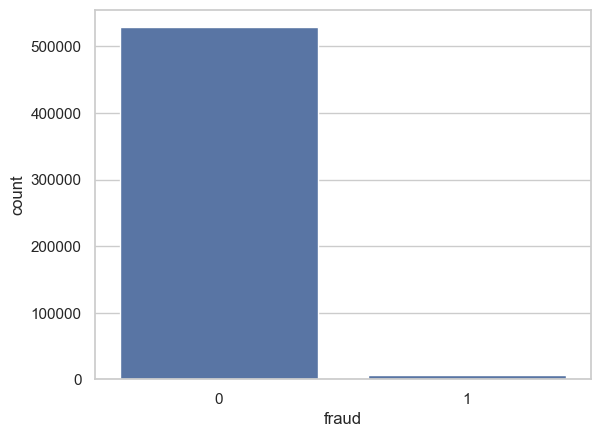

In [34]:
# Distribution of target
sns.countplot(data=df, x='fraud')
fraud_rate = df['fraud'].value_counts(normalize=True) * 100
print(fraud_rate)

In [35]:
!git add .
!git commit -m "Target Distribution and Class Imbalance"
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


Everything up-to-date


In [36]:
# Unique value count
cat_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check a few example values
df[cat_cols].apply(lambda x: x.unique()[:5])

customer: 4112 unique values
gender: 4 unique values
zipcodeOri: 1 unique values
merchant: 50 unique values
zipMerchant: 1 unique values
category: 15 unique values


customer       ['C1760492708', 'C1222389110', 'C879949041', '...
gender                                      ['F', 'M', 'E', 'U']
zipcodeOri                                             ['28007']
merchant       ['M1823072687', 'M692898500', 'M348934600', 'M...
zipMerchant                                            ['28007']
category       ['es_transportation', 'es_health', 'es_fashion...
dtype: object

In [37]:
# Drop useless columns
df.drop(['zipcodeOri', 'zipMerchant'], axis=1, inplace=True)


In [38]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0
4,152,'C671449181','3','F','M692898500','es_health',9.05,0
...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0


#### Feature Engineering


In [40]:
df['transaction_id'] = df.index

In [50]:
import featuretools as ft

# Create an empty EntitySet
es = ft.EntitySet(id="fraud_data")

# Add the base dataframe
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df.drop(columns=['fraud']),  # Drop target to prevent leakage
    index="transaction_id",                # You must have a unique ID column            
)


C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\P

In [51]:
df


,step,customer,age,gender,merchant,category,amount,fraud,transaction_id
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0,1
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0,2
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0,3
4,152,'C671449181','3','F','M692898500','es_health',9.05,0,4
...,...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0,535173
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0,535174
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0,535175
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0,535176


In [52]:
# Normalize customer entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="customers",
    index="customer"
)

# Normalize merchant entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="merchants",
    index="merchant"
)


In [53]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="transactions",
    agg_primitives=["mean", "sum", "count", "mode", "std", "max", "min"],
    trans_primitives=["month", "weekday", "hour", "day"],
    max_depth=2,
    verbose=True
)

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'hour', 'month', 'weekday']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 37 features
Elapsed: 00:00 | Progress:   0%|                                                                                       

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x000001F1B56899E0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x000001F1B568A3E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided ca

Elapsed: 00:03 | Progress:  26%|██████████████████████▍                                                                

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x000001F1B568A3E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x000001F1B568A520> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided ca

Elapsed: 00:13 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [54]:
print(feature_matrix.head())

                step       customer  age gender       merchant  \
transaction_id                                                   
0                 11  'C1760492708'  '1'    'F'  'M1823072687'   
1                172  'C1222389110'  '3'    'M'  'M1823072687'   
2                106   'C879949041'  '3'    'F'  'M1823072687'   
3                 86   'C409740988'  '5'    'M'  'M1823072687'   
4                152   'C671449181'  '3'    'F'   'M692898500'   

                           category  amount  customers.COUNT(transactions)  \
transaction_id                                                               
0               'es_transportation'   52.35                            163   
1               'es_transportation'   14.75                            159   
2               'es_transportation'    3.73                            145   
3               'es_transportation'   61.42                            154   
4                       'es_health'    9.05                          

In [55]:
feature_matrix.head(20).style.set_sticky()

,step,customer,age,gender,merchant,category,amount,customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MAX(transactions.step),customers.MEAN(transactions.amount),customers.MEAN(transactions.step),customers.MIN(transactions.amount),customers.MIN(transactions.step),customers.MODE(transactions.age),customers.MODE(transactions.category),customers.MODE(transactions.gender),customers.MODE(transactions.merchant),customers.STD(transactions.amount),customers.STD(transactions.step),customers.SUM(transactions.amount),customers.SUM(transactions.step),merchants.COUNT(transactions),merchants.MAX(transactions.amount),merchants.MAX(transactions.step),merchants.MEAN(transactions.amount),merchants.MEAN(transactions.step),merchants.MIN(transactions.amount),merchants.MIN(transactions.step),merchants.MODE(transactions.age),merchants.MODE(transactions.category),merchants.MODE(transactions.customer),merchants.MODE(transactions.gender),merchants.STD(transactions.amount),merchants.STD(transactions.step),merchants.SUM(transactions.amount),merchants.SUM(transactions.step)
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.350000,163,160.410000,178.000000,29.707914,90.269939,0.240000,0.000000,'1','es_transportation','F','M1823072687',24.835121,51.235364,4842.390000,14714.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.750000,159,194.830000,179.000000,29.407547,89.584906,0.170000,0.000000,'3','es_transportation','M','M1823072687',25.339354,53.253431,4675.800000,14244.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
2,106,'C879949041','3','F','M1823072687','es_transportation',3.730000,145,135.920000,178.000000,29.027793,89.593103,0.340000,2.000000,'3','es_transportation','F','M1823072687',20.905876,52.472148,4209.030000,12991.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
3,86,'C409740988','5','M','M1823072687','es_transportation',61.420000,154,189.110000,179.000000,31.522208,92.623377,0.530000,0.000000,'5','es_transportation','M','M1823072687',27.177598,50.845669,4854.420000,14264.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
4,152,'C671449181','3','F','M692898500','es_health',9.050000,19,316.030000,163.000000,84.684737,102.631579,9.050000,0.000000,'3','es_health','F','M480139044',76.658094,53.958019,1609.010000,1950.000000,805,904.510000,179.000000,109.754211,77.915528,0.180000,0.000000,'2','es_health','C1001065306','F',96.326950,50.150126,88352.140000,62722.000000
5,161,'C117112395','3','F','M1823072687','es_transportation',26.440000,163,270.960000,179.000000,33.290184,92.472393,0.040000,0.000000,'3','es_transportation','F','M1823072687',35.308278,52.761789,5426.300000,15073.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
6,145,'C1449000407','2','M','M1823072687','es_transportation',21.620000,158,82.940000,179.000000,28.112152,91.670886,0.880000,0.000000,'2','es_transportation','M','M1823072687',18.736177,52.516475,4441.720000,14484.000000,269636,115.260000,179.000000,26.954451,107.562651,0.000000,0.000000,'2','es_transportation','C222098023','F',17.536763,47.302679,7267890.280000,29002763.000000
7,141,'C1266329800','4','F','M1823072687','es_transportation',18.390000,148,166.750000,179.000000,30.021622,92.385135,0.570000,0.000000,'4','es_transportation','F','M348934600',22.516502,52.529943,4443.200000,13673.000000,269

In [56]:
feature_matrix = feature_matrix.reset_index()  # To bring transaction_id into a column
df['transaction_id'] = df.index                # If not already there

# Merge back the target
feature_matrix = feature_matrix.merge(df[['transaction_id', 'fraud']], on='transaction_id', how='left')

In [57]:
!git add .
!git commit -m "Feature Engineering"
!git push

[main d7a6e1f] Feature Engineering
 2 files changed, 4280 insertions(+), 47 deletions(-)


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   db40cd0..d7a6e1f  main -> main


#### Train-Test split

In [58]:
from sklearn.model_selection import train_test_split

X = feature_matrix.drop(columns=['transaction_id', 'fraud'])
y = feature_matrix['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [63]:
feature_matrix.dtypes

transaction_id                              int64
step                                        int64
customer                                 category
age                                      category
gender                                   category
merchant                                 category
category                                 category
amount                                    float64
customers.COUNT(transactions)               Int64
customers.MAX(transactions.amount)        float64
customers.MAX(transactions.step)          float64
customers.MEAN(transactions.amount)       float64
customers.MEAN(transactions.step)         float64
customers.MIN(transactions.amount)        float64
customers.MIN(transactions.step)          float64
customers.MODE(transactions.age)         category
customers.MODE(transactions.category)    category
customers.MODE(transactions.gender)      category
customers.MODE(transactions.merchant)    category
customers.STD(transactions.amount)        float64


In [62]:
print(X_train.dtypes[X_train.dtypes == 'object'])


Series([], dtype: object)


##### SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

ValueError: Cannot cast object dtype to float64

In [60]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# Make a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Convert 'age' column to string type to ensure compatibility with OneHotEncoder
df_encoded['age'] = df_encoded['age'].astype(str)

# Select categorical columns for one-hot encoding
categorical_cols = ['age', 'gender', 'category']

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_encoded[categorical_cols])

# Create a DataFrame for the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_encoded.index)


In [15]:
encoded_df

,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',gender_'F',gender_'M',gender_'U',category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535176,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
